In [79]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
import keras
import matplotlib.pyplot as plt
import ssl
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import scipy
import seaborn as sns; sns.set()
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [80]:
print("\nLoading data...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
y_train = y_train.flatten()
y_test = y_test.flatten()
print(x_train.shape, y_train.shape, x_train.dtype, y_train.dtype)
print(x_test.shape, y_test.shape, x_test.dtype, y_test.dtype)


Loading data...
(50000, 32, 32, 3) (50000,) float64 int32
(10000, 32, 32, 3) (10000,) float64 int32


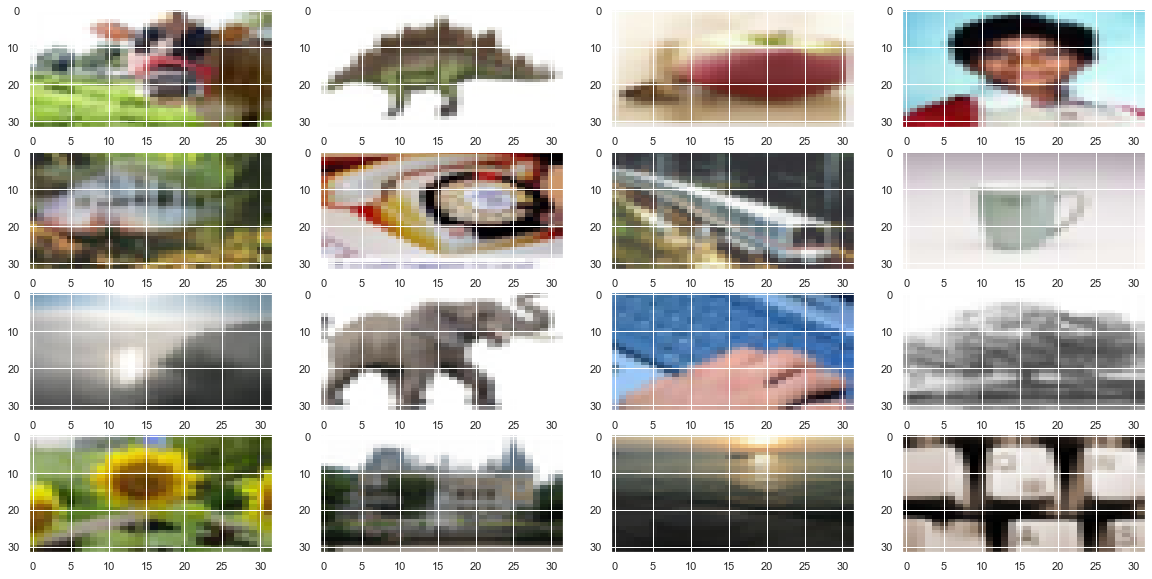

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6932735842798744676
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4147576832
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7337744841204191854
physical_device_desc: "device: 0, name: GeForce RTX 2060, pci bus id: 0000:2d:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [81]:


fig, ax = plt.subplots(4, 4)
k = 0
 
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [82]:

num_classes = 100

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=x_train[0].shape))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(filters=248, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(filters=248, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=2014, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=100, activation = 'softmax'))

print(model.summary())

"""
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=x_train[0].shape))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(128,3,activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(256,3, activation='relu', padding = 'same'))
model.add(keras.layers.Conv2D(256,3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(100, activation='softmax'))

print(model.summary())
"""

ValueError: Exception encountered when calling layer "max_pooling2d_126" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_126/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,128].

Call arguments received by layer "max_pooling2d_126" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 128), dtype=float32)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', 
                                              mode='max', 
                                              patience=5, 
                                              verbose=1)
model_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', 
                                                monitor='accuracy', 
                                                save_best_only=True)

data_gen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                                          height_shift_range=0.1,
                                                          horizontal_flip = True)

history = model.fit(x_train, y_train, epochs=30, 
                    callbacks=[early_stop, model_save],
                    verbose=1,
                    validation_data=(x_test, y_test))

plt.rcParams["figure.figsize"] = (20,10)

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# restore weights from the best training point
model.load_weights('best_model.h5')

scores = model.evaluate(x_train, y_train, verbose=0)
print('TRAINING SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

scores = model.evaluate(x_test, y_test, verbose=0)
print('\nTEST SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step


Text(365.3, 0.5, 'pred label')

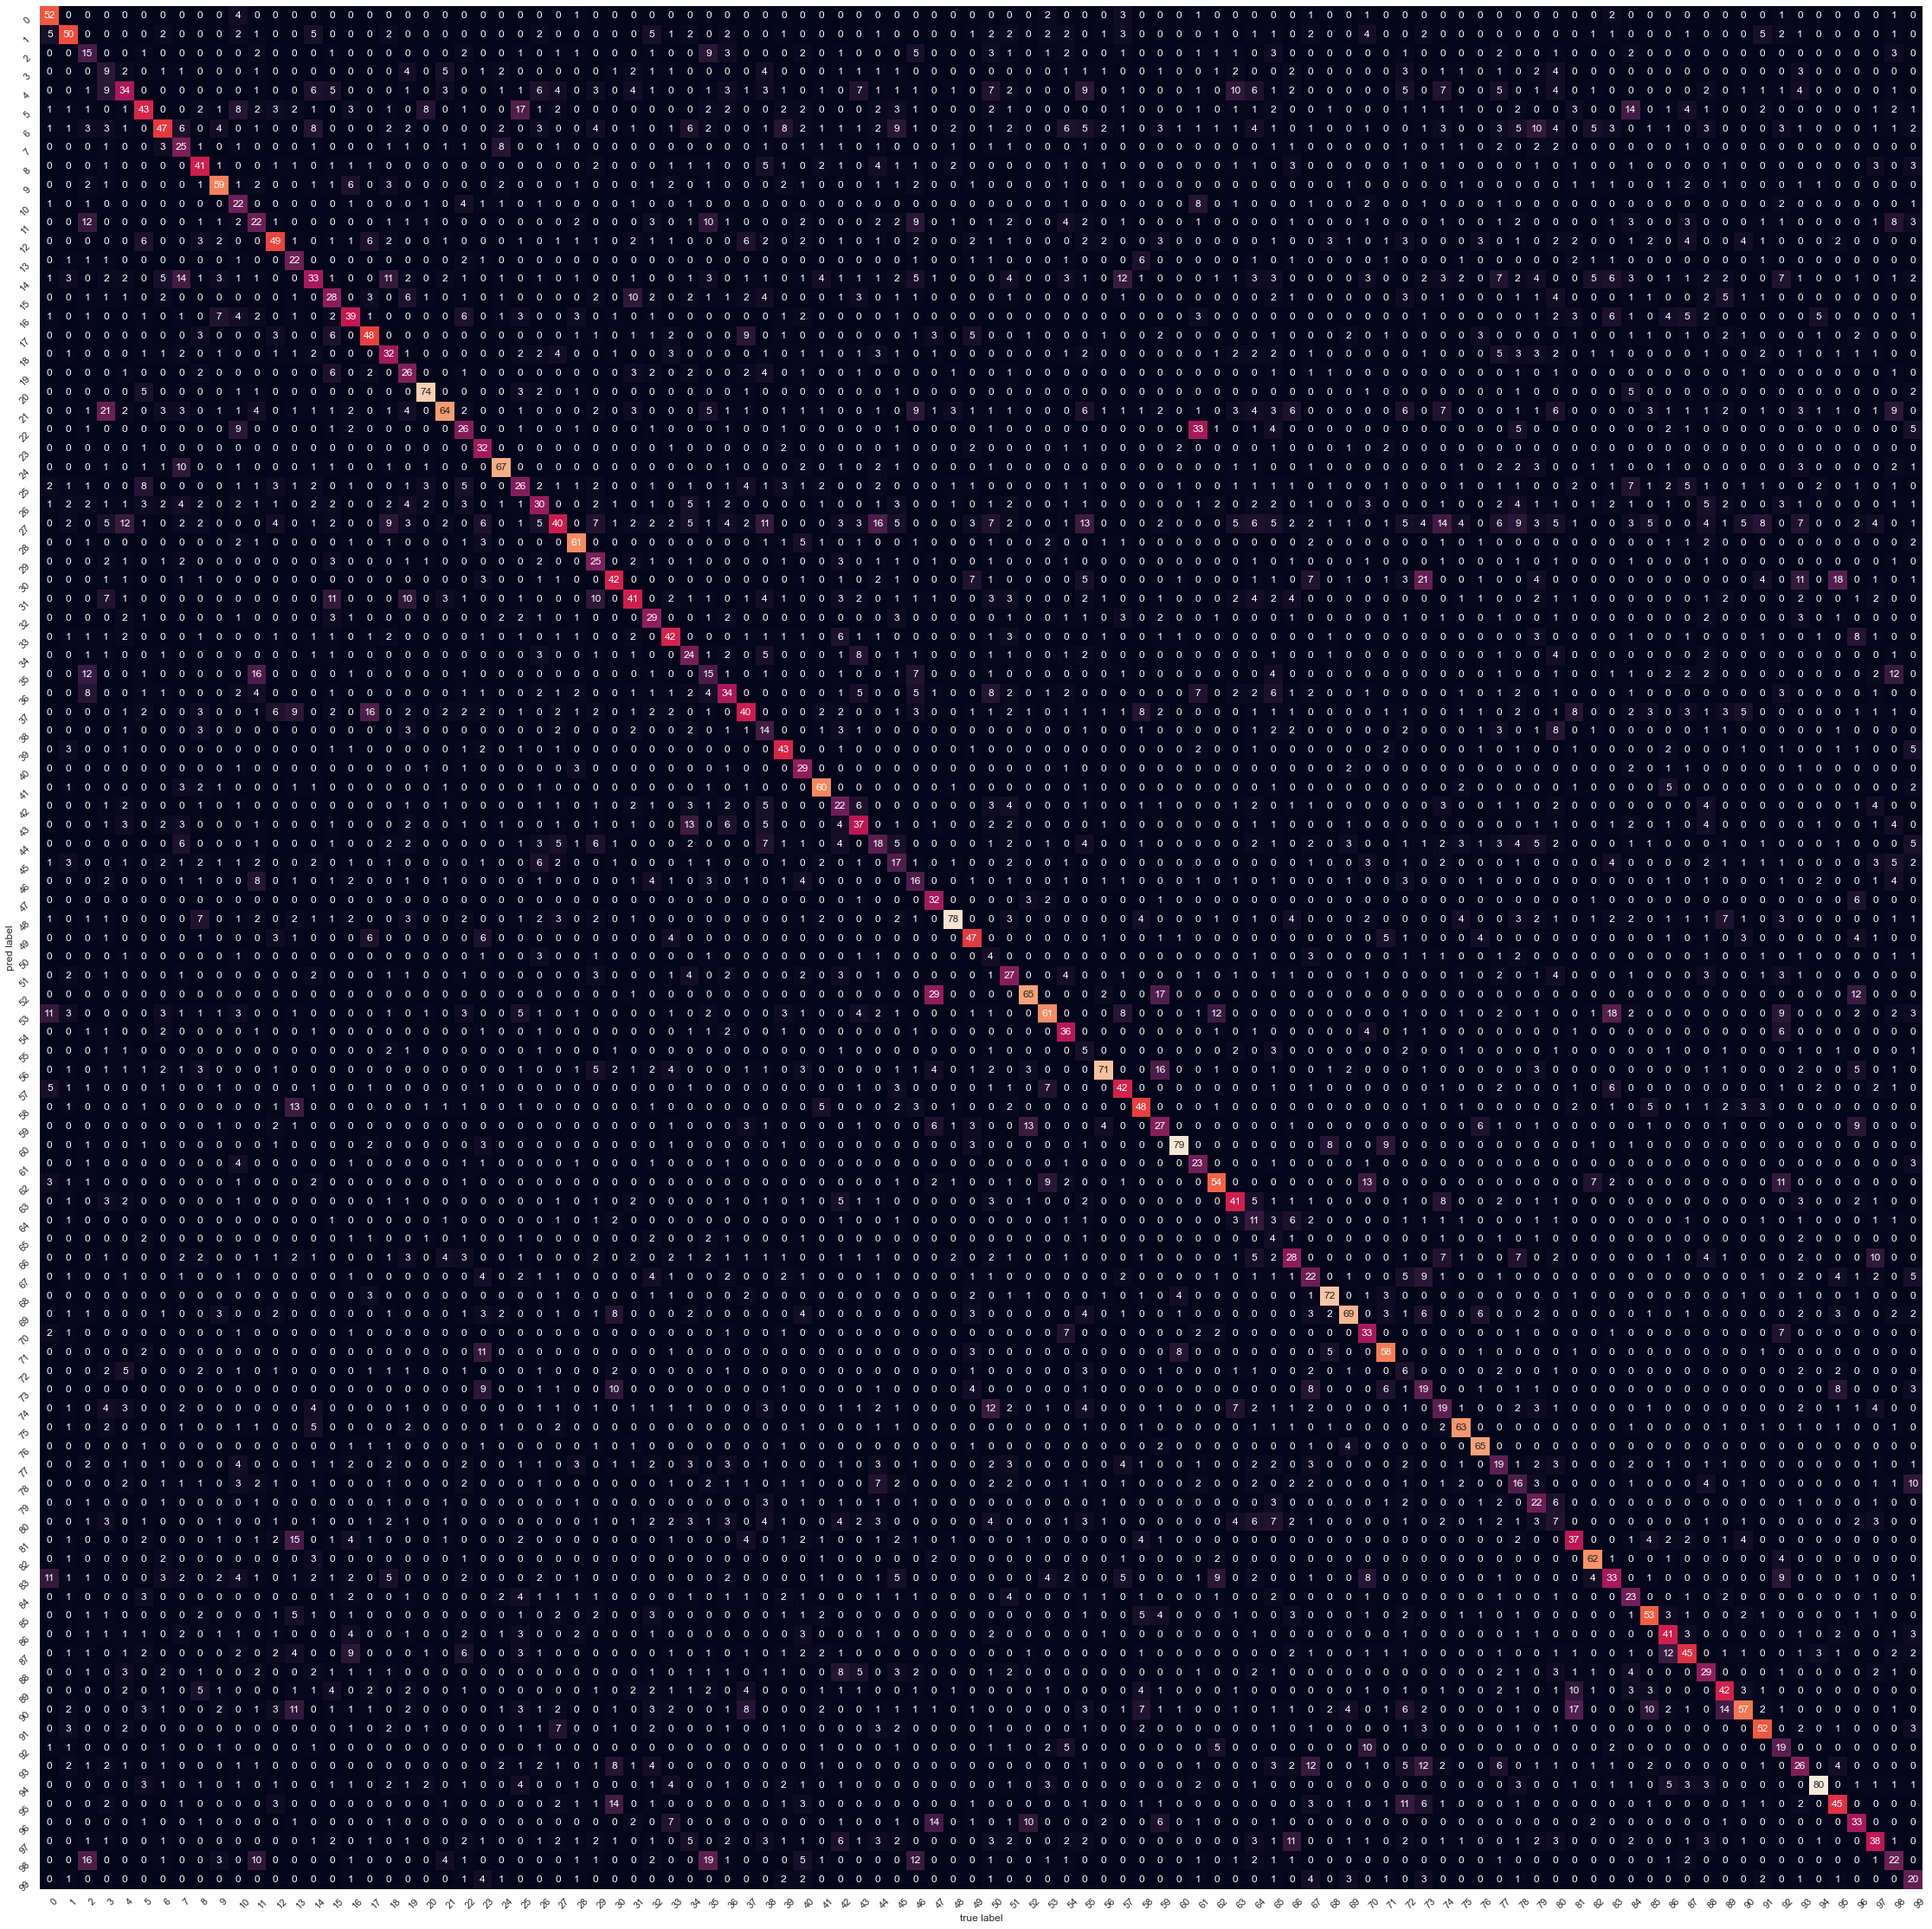

In [68]:
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (40, 40))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(rotation=45, ha='left')
plt.yticks(rotation=45,  va='top')
plt.xlabel('true label')
plt.ylabel('pred label')